## Project Case Scenario

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

    Is there a significant difference in the median value of houses bounded by the Charles river or not?

    Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

    Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

    What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

### Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

Task 3: Load the dataset in a Jupyter Notebook using Watson Studio.

Task 4: Generate basic statistics and visualizations for upper management. 

Task 5: Use the appropriate tests to answer the questions provided.

Task 6: Share your Jupyter Notebook.

 This project is worth 15% of your final grade. Detailed instructions for each of these tasks follow.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

## import dataset

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [3]:
boston_df.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


- CRIM - per capita crime rate by town 城镇人均犯罪率
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft. | 超过25000平方英尺地块的住宅用地比例
- INDUS - proportion of non-retail business acres per town. | 每个城镇的非零售商业用地比例
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
- NOX - nitric oxides concentration (parts per 10 million) | 一氧化氮浓度
- RM - average number of rooms per dwelling  | 每个住宅的平均房间数
- AGE - proportion of owner-occupied units built prior to 1940 | 1940年以前建造的业主自用公寓的比例
- DIS - weighted distances to five Boston employment centres | 与波士顿五个就业中心的加权距离
- RAD - index of accessibility to radial highways  | 高速公路可达性指数
- TAX - full-value property-tax rate per `$10,000` | 每10000美元的全价值物业税税率
- PTRATIO - pupil-teacher ratio by town | 城镇师生比例
- LSTAT - `%` lower status of the population | 底层人数比例
- MEDV - Median value of owner-occupied homes in `$1000's` | 自住房屋的中位价值（单位：1000美元）

## Generate Descriptive Statistics and Visualizations

```
    For the "Median value of owner-occupied homes" provide a boxplot

    Provide a  histogram for the Charles river variable

    Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

    Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

    Create a histogram for the pupil to teacher ratio variable
```

> For the "Median value of owner-occupied homes" provide a boxplot

<AxesSubplot:ylabel='MEDV'>

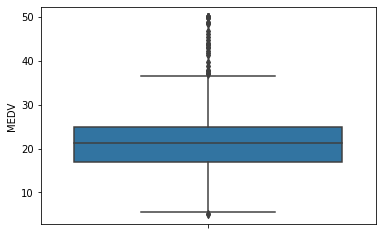

In [6]:
sns.boxplot(y=boston_df['MEDV'])

- The bottom horizontal line is the minimum value of the Median value of owner-occupied homes, it is under `$10,000`
- The first horizontal line of the rectange shape of the box plot is first quartile (or `25%`) , which is between `$15,000` and `$20,000`.
- The median of the MEDV is a litter more than `$20,000`
- The third quartile of the MEDV is around `$25,000`
- The maximum of the MEDV is above  `$35,000`, but less than `$40,000`

Small diamond shape of the box plot is outlier data or erroneous data.

We could find the value in the description above.

In [7]:
boston_df['MEDV'].min()

5.0

In [8]:
boston_df['MEDV'].median()

21.2

> Provide a  histogram for the Charles river variable

<AxesSubplot:xlabel='CHAS', ylabel='Count'>

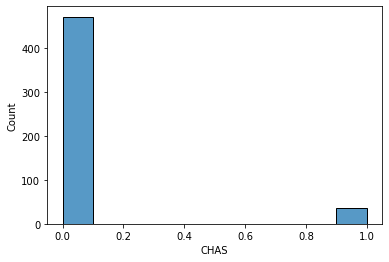

In [9]:
# Provide a  histogram for the Charles river variable
sns.histplot(boston_df['CHAS'])

The number of the houses that track bounds river is much less than that other houses that don't track.

C:\Users\Jeremy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CHAS', ylabel='Density'>

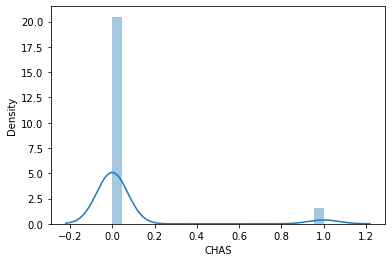

In [10]:
sns.distplot(boston_df['CHAS'])

>  Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [11]:
mask_younger = boston_df['AGE'] <= 35
mask_between = (boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)
mask_older = boston_df['AGE'] >= 70

boston_df.loc[mask_younger, 'age_group'] = '35 years and younger'
boston_df.loc[mask_between, 'age_group'] = 'between 35 and 70 years'
boston_df.loc[mask_older, 'age_group'] = '70 years and older'

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

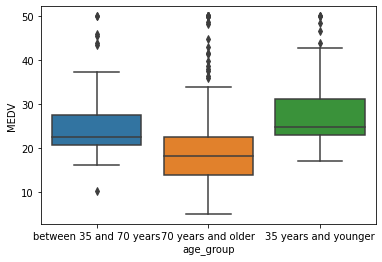

In [12]:
sns.boxplot(x='age_group', y='MEDV', data=boston_df)

Conclusion: The median of MEDV(70 years and older) is the smallest, and the "35 years and younger" has the highest median of MEDV.

So, the younger, the more higher MEDV.

>  Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

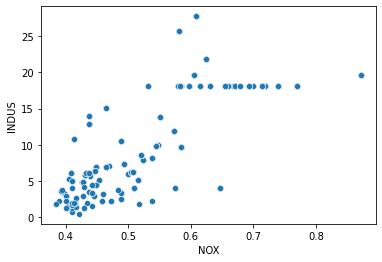

In [13]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

The higher the Nitric oxide concentrations, the higher the proportion of non-retail business acres per town. 

> Create a histogram for the pupil to teacher ratio variable

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

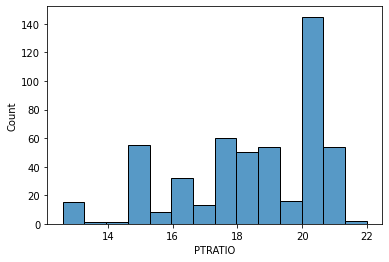

In [14]:
sns.histplot(boston_df['PTRATIO'])

C:\Users\Jeremy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PTRATIO', ylabel='Density'>

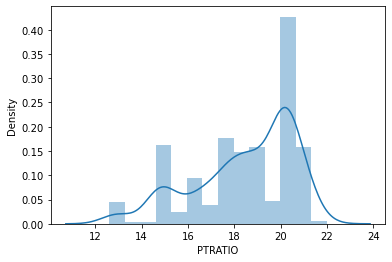

In [15]:
sns.distplot(boston_df['PTRATIO'])

The 'pupil to teacher ratio variable' concentrates in the [15, 21] range.

## Use the appropriate tests to answer the questions provided.

For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

```
State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.
```

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis:

- The null hypotheis: H0, u1 = u2. There is no significant difference in median value of houses bounded by the Charles river or not
- The alternative hypothesis H1: u1 ！= u2, there is a significant difference ..

Alpha = 0.05

In [16]:
mask_bounded = boston_df['CHAS'] == 1
mask_other = boston_df['CHAS'] == 0

stats.levene(boston_df[mask_bounded]['MEDV'],
             boston_df[mask_other]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

> We have a t-test called Levene's test to determine the equality of variances. The null hypothesis of the Levene's test is that population variances are equal if the p-value of the test is less 0.05, reject the null hypothesis of equal variances and assume that the variances are unequal.

The p-value is less 0.05, we assume the variances are unequal

In [17]:
# T-test
stats.ttest_ind(boston_df[mask_bounded]['MEDV'],
                boston_df[mask_other]['MEDV'],
                equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

The p-value of the T-test is less than 0.05/2, we reject the null hypothesis.

So the difference in median value of houses bounded by the Charles river or not is statistically significant.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [18]:
# We group the data into categories as the one-way ANOVA can't work with
# continuous variable
mask_younger = boston_df['AGE'] <= 35
mask_between = (boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)
mask_older = boston_df['AGE'] >= 70

boston_df.loc[mask_younger, 'age_group'] = '35 years and younger'
boston_df.loc[mask_between, 'age_group'] = 'between 35 and 70 years'
boston_df.loc[mask_older, 'age_group'] = '70 years and older'

State the hypothesis

- the null hypothesis H0: u1=u2=u3, there is not difference in MEDV for AGE, the 3 population means are equal
- the alternative hypothesis H1, u1 ！= u2 ！=u3, there is significant difference.

Alpha = 0.05

In [19]:
mask1 = boston_df['age_group'] == '35 years and younger'
mask2 = boston_df['age_group'] == 'between 35 and 70 years'
mask3 = boston_df['age_group'] == '70 years and older'

stats.levene(boston_df[mask1]['MEDV'],
             boston_df[mask2]['MEDV'],
             boston_df[mask3]['MEDV'],
             center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, the variances are equal.

In [21]:
# ANOVA test
younger = boston_df[mask1]['MEDV']
between = boston_df[mask2]['MEDV']
older = boston_df[mask3]['MEDV']

# run a one-way ANOVA
f_statistic, p_value = stats.f_oneway(younger, between, older)
print("F_statistic: {}, P-value: {}".format(f_statistic, p_value))

F_statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


Since the P-value of ANOVA test is less than 0.05, we will reject the null hypothesis.

So there is significant evidence to prove that the MEDV for each proportion of owner occupied units built prior to 1940 (AGE) differ

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis

- Null hypothesis `H0`：Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town  
- Alternative hypothesis `H1`：Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [22]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

Conclusion:
    
Since the P-value(7.9e-98 < 0.05), we reject the null hypothesis H0.

So there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

Null hypothesis H0, DIS does not impact the MEDV   
Alternative Hypothesis H1, DIS does impact the MEDV

alpha = 0.05

In [24]:
# x = DIS, y = MEDV
X = boston_df['DIS']
y = boston_df['MEDV']
# Add an intercept beta_0 to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.21e-08
Time:                        21:15:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
import math
r_square = 0.062

print(math.sqrt(r_square))

0.24899799195977465


Since prob = 1.21e-8 < 0.05, we reject the null hypothesis.

So the DIS has an impact on the MEDV.

R-square is 0.062, R will be 0.249, correlation coefficient is 0.249.

## The END